In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import norm
import math

# Ejemplo de series de tiempo


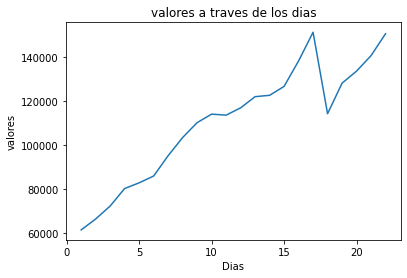

In [2]:
data = [61562,66509,72386,80306,82884,85965,95183,103394,110136,113993,113531,116844,121903,122511,126553,138071,151079,114177,128003,133474,140488,150402]
#importacion de datos
##ejemplo del la clase 1
time_series=pd.Series(data)
days = np.arange(1, len(time_series) + 1)

plt.plot(days, time_series)
plt.xlabel('Dias')
plt.ylabel('valores')
plt.title('valores a traves de los dias')
plt.show()

Un **intervalo de confianza** es un rango de valores que se calcula a partir de una muestra, y que tiene una alta probabilidad (por ejemplo 95%) de **contener el valor real** del parámetro poblacional que estamos estimando (como la media, proporción, o autocorrelación).

\$ IC_{(1 - \alpha)} = 0 \pm Z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} $

Donde:

- \$ \bar{x}$ = media muestral 

- s = desviación estándar muestral (En estos ) 
- n = tamaño de la muestra  
- \$ Z_{\alpha/2} $ = valor crítico de la distribución normal  
  (por ejemplo, 1.96 para 95%)
  
  

Cuando se evalúa si una autocorrelación \$\hat{AR}_k$ es significativa, se construye un intervalo como:

\$
0\pm Z_{\alpha/2} \cdot \text{SE}(\hat{AR}_k)
$

Para datos independientes (ruido blanco):

\$
\text{SE}(\hat{AR}_k) \approx \frac{1}{\sqrt{n}}
$

Por lo tanto, el **rango de no significancia** se define como:

\$
\text{rang} = Z_{\alpha/2} \cdot \frac{1}{\sqrt{n}}
$

Si \$ \hat{AR}_k $ está **fuera de este rango**, se considera **estadísticamente significativo**.

Para ingresar el intervalo de confianza se aplica según su valor contrario al 100% en decimal (tambien llamado nivel de significancia). Por ejemplo (y viendo el codigo) 95%->0,05.

Existen dos tipos de testeo. Unilaterales y bilaterales

Para estos analisis, nos enfocamos en un testeo bilateral. Donde se busca detectar diferencias tanto por encima o por debajo del dato esperado. Es por eso que se aplica 0.05/2

In [73]:
from statsmodels.tsa.stattools import acf
#rango de confianza a tratar
print(stats.norm.ppf(1-0.05/2))
rang= stats.norm.ppf(1-0.05/2)* (1/math.sqrt(len(data)))
print(rang)

#test de hipotesis
acf_values,confint= acf(data, alpha=0.05,bartlett_confint=False)
print(acf_values)
print(confint)



1.959963984540054
0.41786572553513607
[ 1.          0.7813217   0.6266553   0.5096119   0.41623457  0.35906223
  0.18859659  0.06170178 -0.03225255 -0.10556844 -0.17526686 -0.23665695
 -0.27549004 -0.31888546]
[[ 0.58213427  1.41786573]
 [ 0.36345598  1.19918743]
 [ 0.20878957  1.04452102]
 [ 0.09174617  0.92747762]
 [-0.00163115  0.8341003 ]
 [-0.0588035   0.77692796]
 [-0.22926913  0.60646232]
 [-0.35616395  0.4795675 ]
 [-0.45011828  0.38561317]
 [-0.52343417  0.31229728]
 [-0.59313258  0.24259887]
 [-0.65452268  0.18120877]
 [-0.69335577  0.14237568]
 [-0.73675119  0.09898026]]


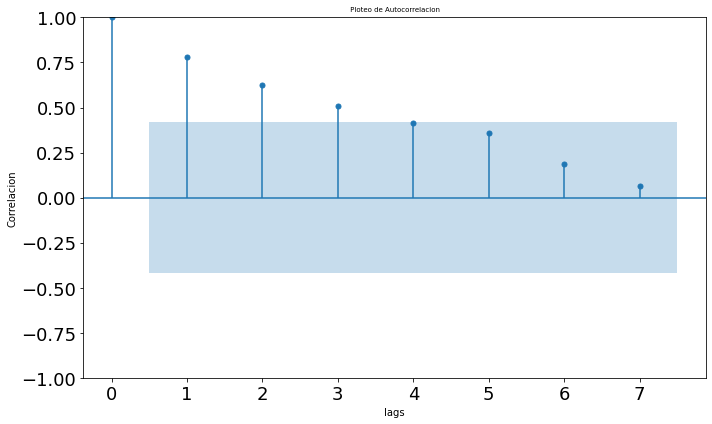

In [74]:
#test de hipotesis
plt.rc("figure", figsize=(10,6))

#funcion de autocorrelacion y ploteo
plot_acf(data, lags=7,alpha=0.05,bartlett_confint=False)

plt.ylim(-1,1)
plt.xlabel('lags', fontsize=10)
plt.ylabel('Correlacion', fontsize=10)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title(' Ploteo de Autocorrelacion', fontsize=7)
plt.tight_layout()
plt.show()

**Tiempos (lags) significativos**:
Los valores de autocorrelacion que estan fuera del intervalo de confianza (mostrado en esa franja sombreada) son considerados estadisticamente significativos, indicando una autocorrelacion genuina en ese tiempo.

**Tendencia**:
una caida lenta en los valores de autocorrelacion a medida que el tiempo (lags) aumente indica una presencia de tendencia en la serie de tiempo.

**Ruido blanco**
Para una serie de tiempo puramente aleatoria, **todos** los valores de autocorrelacion deberian estar cercana a 0 o dentro del intervalo de confianza, indicando una nula precencia de un patron significativo.